<a href="https://colab.research.google.com/github/devabhishek271/Healthcare_Management-using-DS/blob/master/HealthAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
healthtrn=pd.read_csv("/content/drive/My Drive/Colab Notebooks/healthtrn.csv")
healthtrn.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc=LabelEncoder()
onc=OrdinalEncoder()
healthtrn[["Hospital_type_code", "Hospital_region_code", "Department", "Ward_Type", "Ward_Facility_Code", "Type of Admission", "Severity of Illness", "Age"]]=onc.fit_transform(healthtrn[["Hospital_type_code", "Hospital_region_code", "Department", "Ward_Type", "Ward_Facility_Code", "Type of Admission", "Severity of Illness", "Age"]])
healthtrn['Stay']=enc.fit_transform(healthtrn[['Stay']])
healthtrn['Stay'].value_counts()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64

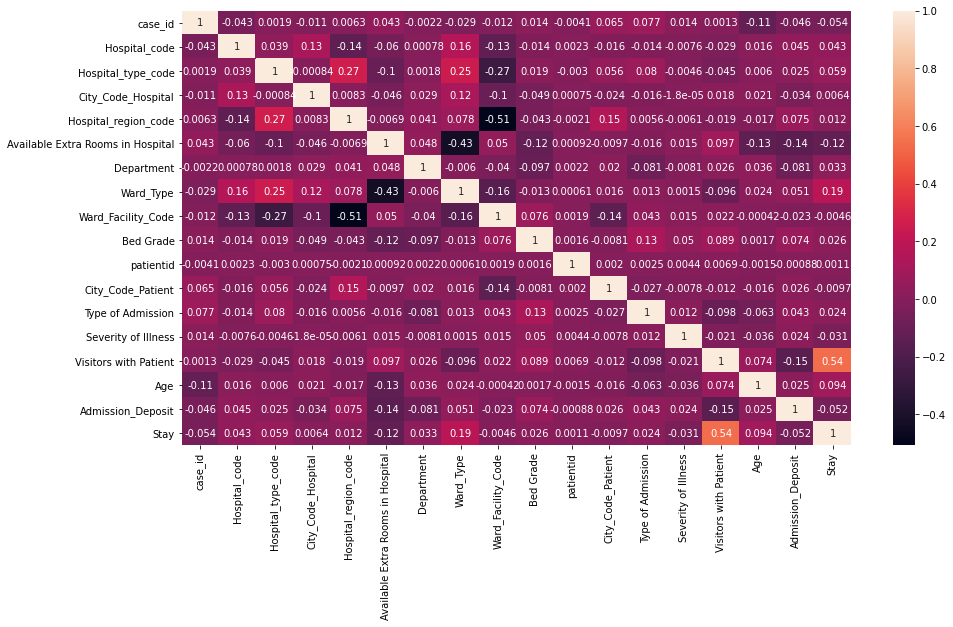

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(healthtrn.corr(), annot=True)

In [ ]:
healthtrn.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2.0,3,2.0,3,3.0,2.0,5.0,2.0,31397,7.0,0.0,0.0,2,5.0,4911.0,0
1,2,2,2.0,5,2.0,2,3.0,3.0,5.0,2.0,31397,7.0,1.0,0.0,2,5.0,5954.0,4
2,3,10,4.0,1,0.0,2,1.0,3.0,4.0,2.0,31397,7.0,1.0,0.0,2,5.0,4745.0,3
3,4,26,1.0,2,1.0,2,3.0,2.0,3.0,2.0,31397,7.0,1.0,0.0,2,5.0,7272.0,4
4,5,26,1.0,2,1.0,2,3.0,3.0,3.0,2.0,31397,7.0,1.0,0.0,2,5.0,5558.0,4


In [ ]:
new_health=healthtrn.drop(columns=['case_id', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Ward_Facility_Code', 'patientid', 'City_Code_Patient', 'Severity of Illness', 'Admission_Deposit'])
new_health.head()

,Hospital_code,Hospital_type_code,Department,Ward_Type,Bed Grade,Type of Admission,Visitors with Patient,Age,Stay
0,8,2.0,3.0,2.0,2.0,0.0,2,5.0,0
1,2,2.0,3.0,3.0,2.0,1.0,2,5.0,4
2,10,4.0,1.0,3.0,2.0,1.0,2,5.0,3
3,26,1.0,3.0,2.0,2.0,1.0,2,5.0,4
4,26,1.0,3.0,3.0,2.0,1.0,2,5.0,4


In [ ]:
x=new_health.drop(columns=['Stay'])
y=new_health['Stay']

In [ ]:
xTrain, xTest, yTrain, yTest=train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled= scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)

In [ ]:
import xgboost
from xgboost import XGBClassifier
xboost=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xboost.fit(xTrain, yTrain)
# make predictions for test data
y_pred = xboost.predict(xTest)
from sklearn.metrics import accuracy_score
accuracy = 100 * accuracy_score(yTest, y_pred)
accuracy

40.84599924632584

In [ ]:
healthtest=pd.read_csv('/content/drive/My Drive/Colab Notebooks/healthtst.csv')
healthtest.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [ ]:
staytest=healthtest.drop(columns=['case_id', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Ward_Facility_Code', 'patientid', 'City_Code_Patient', 'Severity of Illness', 'Admission_Deposit'])
staytest.head()

,Hospital_code,Hospital_type_code,Department,Ward_Type,Bed Grade,Type of Admission,Visitors with Patient,Age
0,21,c,gynecology,S,2.0,Emergency,2,71-80
1,29,a,gynecology,S,2.0,Trauma,4,71-80
2,26,b,gynecology,Q,4.0,Emergency,3,71-80
3,6,a,gynecology,Q,2.0,Trauma,3,71-80
4,28,b,gynecology,R,2.0,Trauma,4,71-80


In [ ]:
staytest[["Hospital_type_code", "Department", "Ward_Type", "Age", "Type of Admission"]]=onc.fit_transform(staytest[["Hospital_type_code", "Department", "Ward_Type", "Age",  "Type of Admission"]])

In [ ]:
staytest.head()

,Hospital_code,Hospital_type_code,Department,Ward_Type,Bed Grade,Type of Admission,Visitors with Patient,Age
0,21,2.0,2.0,3.0,2.0,0.0,2,7.0
1,29,0.0,2.0,3.0,2.0,1.0,4,7.0
2,26,1.0,2.0,1.0,4.0,0.0,3,7.0
3,6,0.0,2.0,1.0,2.0,1.0,3,7.0
4,28,1.0,2.0,2.0,2.0,1.0,4,7.0


In [ ]:
finalstaynew=scaler.fit_transform(staytest)

In [ ]:
patientstayfinal=xboost.predict(finalstaynew)
heal=enc.inverse_transform(patientstayfinal)

In [ ]:
healthAV=pd.DataFrame({'case_id': healthtest['case_id'], 'Stay': heal})
healthAV

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,21-30
137053,455492,11-20
137054,455493,11-20
137055,455494,11-20


In [ ]:
healthAV.to_csv('healthAV.csv', index=False)